In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency

In [2]:
email_opened_table=pd.read_csv("email_opened_table.csv")
email_table=pd.read_csv("email_table.csv")
link_click_table=pd.read_csv("link_clicked_table.csv")

In [4]:
email_table.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases
0,85120,short_email,personalized,2,Sunday,US,5
1,966622,long_email,personalized,12,Sunday,UK,2
2,777221,long_email,personalized,11,Wednesday,US,2
3,493711,short_email,generic,6,Monday,UK,1
4,106887,long_email,generic,14,Monday,US,6


Question1:What % of users opened email and what % clicked on the link within email

In [19]:
#%of users opened email
per_email_open=email_opened_table.shape[0]/email_table.shape[0]
str(per_email_open*100) + "%" +" "+ "opened email"

'10.345% opened email'

In [24]:
#%of users opened link within email
per_link_open=link_click_table.shape[0]/email_table.shape[0]
str(per_link_open*100) + "%" +" "+ "opened link within email"

'2.119% opened link within email'

merge datsets

In [3]:
email_opened_table['email_opened']=1
link_click_table['link_opened']=1

In [4]:
email_table= pd.merge(email_table, email_opened_table, on='email_id', how='left')
email_table=pd.merge(email_table,link_click_table,on='email_id',how='left')

In [47]:
email_table.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,email_opened,link_opened
0,85120,short_email,personalized,2,Sunday,US,5,NaN,NaN
1,966622,long_email,personalized,12,Sunday,UK,2,1.0,1.0
2,777221,long_email,personalized,11,Wednesday,US,2,NaN,NaN
3,493711,short_email,generic,6,Monday,UK,1,NaN,NaN
4,106887,long_email,generic,14,Monday,US,6,NaN,NaN


In [5]:
email_table['email_opened']=email_table['email_opened'].fillna(0)
email_table['link_opened']=email_table['link_opened'].fillna(0)

In [49]:
email_table.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,email_opened,link_opened
0,85120,short_email,personalized,2,Sunday,US,5,0.0,0.0
1,966622,long_email,personalized,12,Sunday,UK,2,1.0,1.0
2,777221,long_email,personalized,11,Wednesday,US,2,0.0,0.0
3,493711,short_email,generic,6,Monday,UK,1,0.0,0.0
4,106887,long_email,generic,14,Monday,US,6,0.0,0.0


Question2:The VP of marketing thinks that it is stupid to send emails to a random subset and in a random way. Based on all the information you have about the emails that were sent, can you build a model to optimize in future email campaigns to maximize the probability of users clicking on the link inside the email?

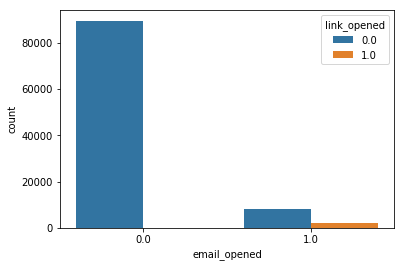

In [68]:
sns.countplot(x="email_opened",hue="link_opened", data=email_table)
plt.show()

There seems to be a strong relation between users who clicked email and opened link as evident from the count plot. So for further
we will only show plot between feature and if user opened the email

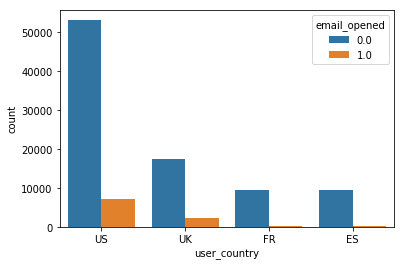

In [52]:
sns.countplot(x="user_country",hue="email_opened", data=email_table)
plt.show()

maximum emails are sent to users in US with most of the people opening emails in us only. 

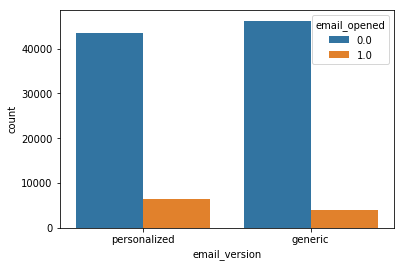

In [55]:
sns.countplot(x="email_version",hue="email_opened", data=email_table)
plt.show()

We see that even though less personalized emails are sent than the generic ones, more emails are opened by users who are sent personalized emails.

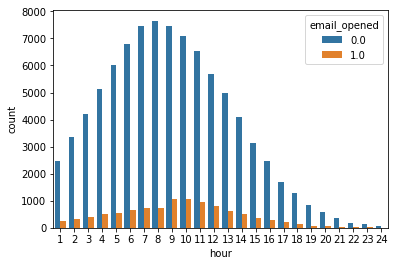

In [62]:
sns.countplot(x="hour",hue="email_opened", data=email_table)
plt.show()

The distributions of hour when email sent and emailopened are not entirely coharent . for example, maximum emails are sent at 
8 hours but the peak number of emails clicked is at 9 and 10 hours. should use statistical test----------------

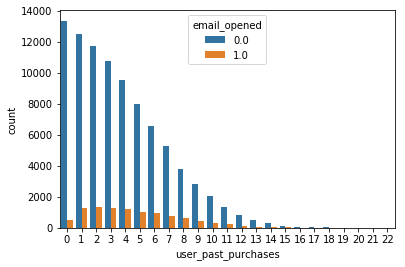

In [63]:
sns.countplot(x="user_past_purchases",hue="email_opened", data=email_table)
plt.show()

maximum emails are opened by users who have between 1 to 4 past purchases 

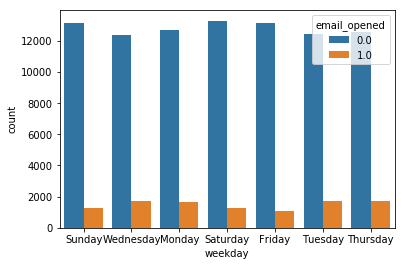

In [66]:
sns.countplot(x="weekday",hue="email_opened", data=email_table)
plt.show()

Maxium emails are opened on weekdays(mon-thur) and relatively less on weekends(fri-sun). Maybe because people dont like checking
mails on weekends if we assume many of them are working professionals with office emails 

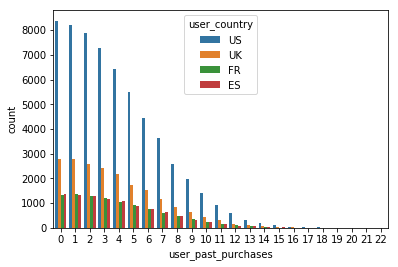

In [67]:
sns.countplot(x="user_past_purchases",hue="user_country", data=email_table)
plt.show()

we can see the biggest market is us,followed by uk,france and spain when talked about past purchases. Let us see at what hours do
individual countries peak in opening emails so that we dont focus are attention completely to us and give emphasis to a holistic
global strategy

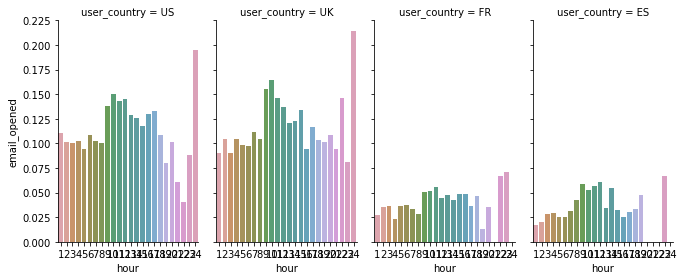

In [73]:
g = sns.factorplot(x="hour", y="email_opened", col="user_country",
                    data=email_table, saturation=.5,
                   kind="bar", ci=None, aspect=.6)

different countries have varied peak hours when email has been opened

statistical tests

In [6]:
email_table.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,email_opened,link_opened
0,85120,short_email,personalized,2,Sunday,US,5,0.0,0.0
1,966622,long_email,personalized,12,Sunday,UK,2,1.0,1.0
2,777221,long_email,personalized,11,Wednesday,US,2,0.0,0.0
3,493711,short_email,generic,6,Monday,UK,1,0.0,0.0
4,106887,long_email,generic,14,Monday,US,6,0.0,0.0


In [10]:
pd.crosstab(index=email_table["user_country"],columns=email_table['user_past_purchases'])

user_past_purchases,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
user_country,,,,,,,,,,,,,,,,,,,,,
ES,1368,1340,1276,1171,1083,892,777,638,463,315,...,63,32,21,13,5,4,2,2,0,0
FR,1341,1390,1292,1212,1057,906,748,605,467,343,...,60,39,15,5,6,5,4,0,1,0
UK,2791,2805,2575,2427,2179,1755,1530,1165,861,646,...,123,80,35,30,11,7,1,2,2,0
US,8377,8216,7893,7267,6424,5489,4463,3643,2602,1992,...,332,211,117,54,38,19,8,7,1,1


In [32]:
chi2, p, dof, ex=chi2_contingency(pd.crosstab(index=email_table["user_country"],columns=email_table['user_past_purchases']))
p

0.3926888874732057

In [12]:
pd.crosstab(index=email_table["email_opened"],columns=email_table['weekday'])

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
email_opened,,,,,,,
0.0,13126,12696,13292,13126,12586,12439,12390
1.0,1051,1667,1277,1261,1691,1704,1694


In [31]:
chi2, p, dof, ex=chi2_contingency(pd.crosstab(index=email_table["email_opened"],columns=email_table['weekday']))
p

8.857573432477101e-74

In [19]:
pd.crosstab(index=email_table["email_version"],columns=email_table['email_opened'])

email_opened,0.0,1.0
email_version,,
generic,46225,3984
personalized,43430,6361


In [29]:
from scipy.stats import chi2_contingency
chi2, p, dof, ex=chi2_contingency(pd.crosstab(index=email_table["email_version"],columns=email_table['email_opened']))
p

2.9597545351683344e-139

reject null hypothesis and there is a relation between email_opened and whether the email version is generic or personalized 

In [48]:
def cross(data,col1,col2):
    return pd.crosstab(index=data[col1],columns=data[col2])

In [101]:
list_=[('email_version','email_opened'),('email_opened','weekday'),('user_past_purchases','email_opened'),('hour','email_opened')]
results=[]
for i in list_:
        results=chi2_contingency(cross(email_table,i[0],i[1]))
        print(str(results[1])+" is p value for" + " "+ str(i))

2.9597545351683344e-139 is p value for ('email_version', 'email_opened')
8.857573432477101e-74 is p value for ('email_opened', 'weekday')
3.038418393167697e-202 is p value for ('user_past_purchases', 'email_opened')
5.896676128146185e-61 is p value for ('hour', 'email_opened')
